In [53]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("./MalwareMemoryDump.csv")

# Display the first few rows of the dataset
#print("First few rows of the dataset:")
#print(df.head())

# Check the column names--> since there are no column names, it will display the first row. 
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Raw_Type', 'pslist_nproc', 'pslist_nppid', 'pslist_avg_threads',
       'pslist_nprocs64bit', 'pslist_avg_handlers', 'dlllist_ndlls',
       'dlllist_avg_dlls_per_proc', 'handles_nhandles',
       'handles_avg_handles_per_proc', 'handles_nport', 'handles_nfile',
       'handles_nevent', 'handles_ndesktop', 'handles_nkey', 'handles_nthread',
       'handles_ndirectory', 'handles_nsemaphore', 'handles_ntimer',
       'handles_nsection', 'handles_nmutant', 'ldrmodules_not_in_load',
       'ldrmodules_not_in_init', 'ldrmodules_not_in_mem',
       'ldrmodules_not_in_load_avg', 'ldrmodules_not_in_init_avg',
       'ldrmodules_not_in_mem_avg', 'malfind_ninjections',
       'malfind_commitCharge', 'malfind_protection',
       'malfind_uniqueInjections', 'psxview_not_in_pslist',
       'psxview_not_in_eprocess_pool', 'psxview_not_in_ethread_pool',
       'psxview_not_in_pspcid_list', 'psxview_not_in_csrss_handles',
       'psxview_not_in_session', 'psxview_not_in_deskthrd

Going to drop the "Raw_Type" column as it is repeated. Going to drop "SubType" column for simplicity, we can also take a look at subclassification too if we really want to. Dropping "pslist_nprocs64bit", "handles_nport", and "svcscan_interactive_process_services" because of single value output. 

In [54]:
cols_to_drop = ["Raw_Type", "SubType", "pslist_nprocs64bit", "handles_nport", "svcscan_interactive_process_services"]
df = df.drop(columns = cols_to_drop)

Renaming the Label column

In [55]:
labels = df['Label'].unique()
#print(labels)

mapping = {labels[i]: i for i in range(len(labels))}
# same as: mapping = {'Benign': 0, 'Malware': 1}

df['Label'] = df['Label'].map(mapping)

Check if there is any empty columns

In [56]:
print(df.isnull().sum().sort_values(ascending=False))

pslist_nproc                              0
malfind_uniqueInjections                  0
psxview_not_in_eprocess_pool              0
psxview_not_in_ethread_pool               0
psxview_not_in_pspcid_list                0
psxview_not_in_csrss_handles              0
psxview_not_in_session                    0
psxview_not_in_deskthrd                   0
psxview_not_in_pslist_false_avg           0
psxview_not_in_eprocess_pool_false_avg    0
psxview_not_in_ethread_pool_false_avg     0
psxview_not_in_pspcid_list_false_avg      0
psxview_not_in_csrss_handles_false_avg    0
psxview_not_in_session_false_avg          0
psxview_not_in_deskthrd_false_avg         0
modules_nmodules                          0
svcscan_nservices                         0
svcscan_kernel_drivers                    0
svcscan_fs_drivers                        0
svcscan_process_services                  0
svcscan_shared_process_services           0
svcscan_nactive                           0
callbacks_ncallbacks            

In [57]:
print(df.shape)
print(df.info())

(58596, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pslist_nproc                            58596 non-null  int64  
 1   pslist_nppid                            58596 non-null  int64  
 2   pslist_avg_threads                      58596 non-null  float64
 3   pslist_avg_handlers                     58596 non-null  float64
 4   dlllist_ndlls                           58596 non-null  int64  
 5   dlllist_avg_dlls_per_proc               58596 non-null  float64
 6   handles_nhandles                        58596 non-null  int64  
 7   handles_avg_handles_per_proc            58596 non-null  float64
 8   handles_nfile                           58596 non-null  int64  
 9   handles_nevent                          58596 non-null  int64  
 10  handles_ndesktop                        58596 

Show the the densities of each feature (Wouldn't recommend running unless you have a beefy computer)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns:
    sns.displot(df[str(col)])
    plt.title(f"{str(col)} Distribution")
    plt.show()

Plot all the box plots to see patterns for classifying the label (optional)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = [col for col in df.columns if col != 'Label']

# Iterate over each column
for col in columns_to_plot:
    
    # Create a box plot for numerical fields
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Label', y=col, data=df)
    plt.title(f'Box plot of {col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    plt.show()

# same as: mapping = {'Benign': 0, 'Malware': 1}

Plot Scatter Plots For Each Feature (optional)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = [col for col in df.columns if col != 'Label']

plt.close()
# Iterate over each column
for col in columns_to_plot:
    
    # Create a scatter plot for numerical fields
    sns.set_style("whitegrid")
    sns.scatterplot(x=df[col], y="Label", data=df)
    plt.show()

Show the Variance of Each Feature

In [60]:
df.var().sort_values(ascending = True)

psxview_not_in_eprocess_pool_false_avg    1.611270e-06
ldrmodules_not_in_load_avg                8.580919e-05
ldrmodules_not_in_mem_avg                 8.585826e-05
ldrmodules_not_in_init_avg                1.022506e-04
callbacks_ngeneric                        1.194498e-04
callbacks_nanonymous                      8.525870e-04
psxview_not_in_eprocess_pool              2.077754e-03
psxview_not_in_session_false_avg          3.029397e-03
psxview_not_in_pslist_false_avg           3.313460e-03
psxview_not_in_pspcid_list_false_avg      3.389045e-03
psxview_not_in_csrss_handles_false_avg    3.774590e-03
psxview_not_in_deskthrd_false_avg         3.786393e-03
psxview_not_in_ethread_pool_false_avg     4.476497e-03
svcscan_fs_drivers                        2.916928e-02
modules_nmodules                          3.930349e-02
Label                                     2.500043e-01
svcscan_process_services                  2.339762e+00
svcscan_shared_process_services           2.403744e+00
pslist_avg

Take a look at the Correlation of Each Feature and the Label

In [61]:
df.corr()["Label"].sort_values()

dlllist_avg_dlls_per_proc                -0.908555
handles_nevent                           -0.876770
handles_nthread                          -0.872531
handles_nmutant                          -0.855148
dlllist_ndlls                            -0.823933
handles_nsection                         -0.820967
pslist_avg_threads                       -0.790666
ldrmodules_not_in_load                   -0.787472
ldrmodules_not_in_mem                    -0.787413
handles_ntimer                           -0.783137
handles_nsemaphore                       -0.769097
svcscan_process_services                 -0.763656
ldrmodules_not_in_init                   -0.716578
svcscan_shared_process_services          -0.710979
handles_nkey                             -0.698239
svcscan_nactive                          -0.653268
svcscan_nservices                        -0.631078
handles_ndesktop                         -0.392919
handles_nhandles                         -0.382270
ldrmodules_not_in_load_avg     

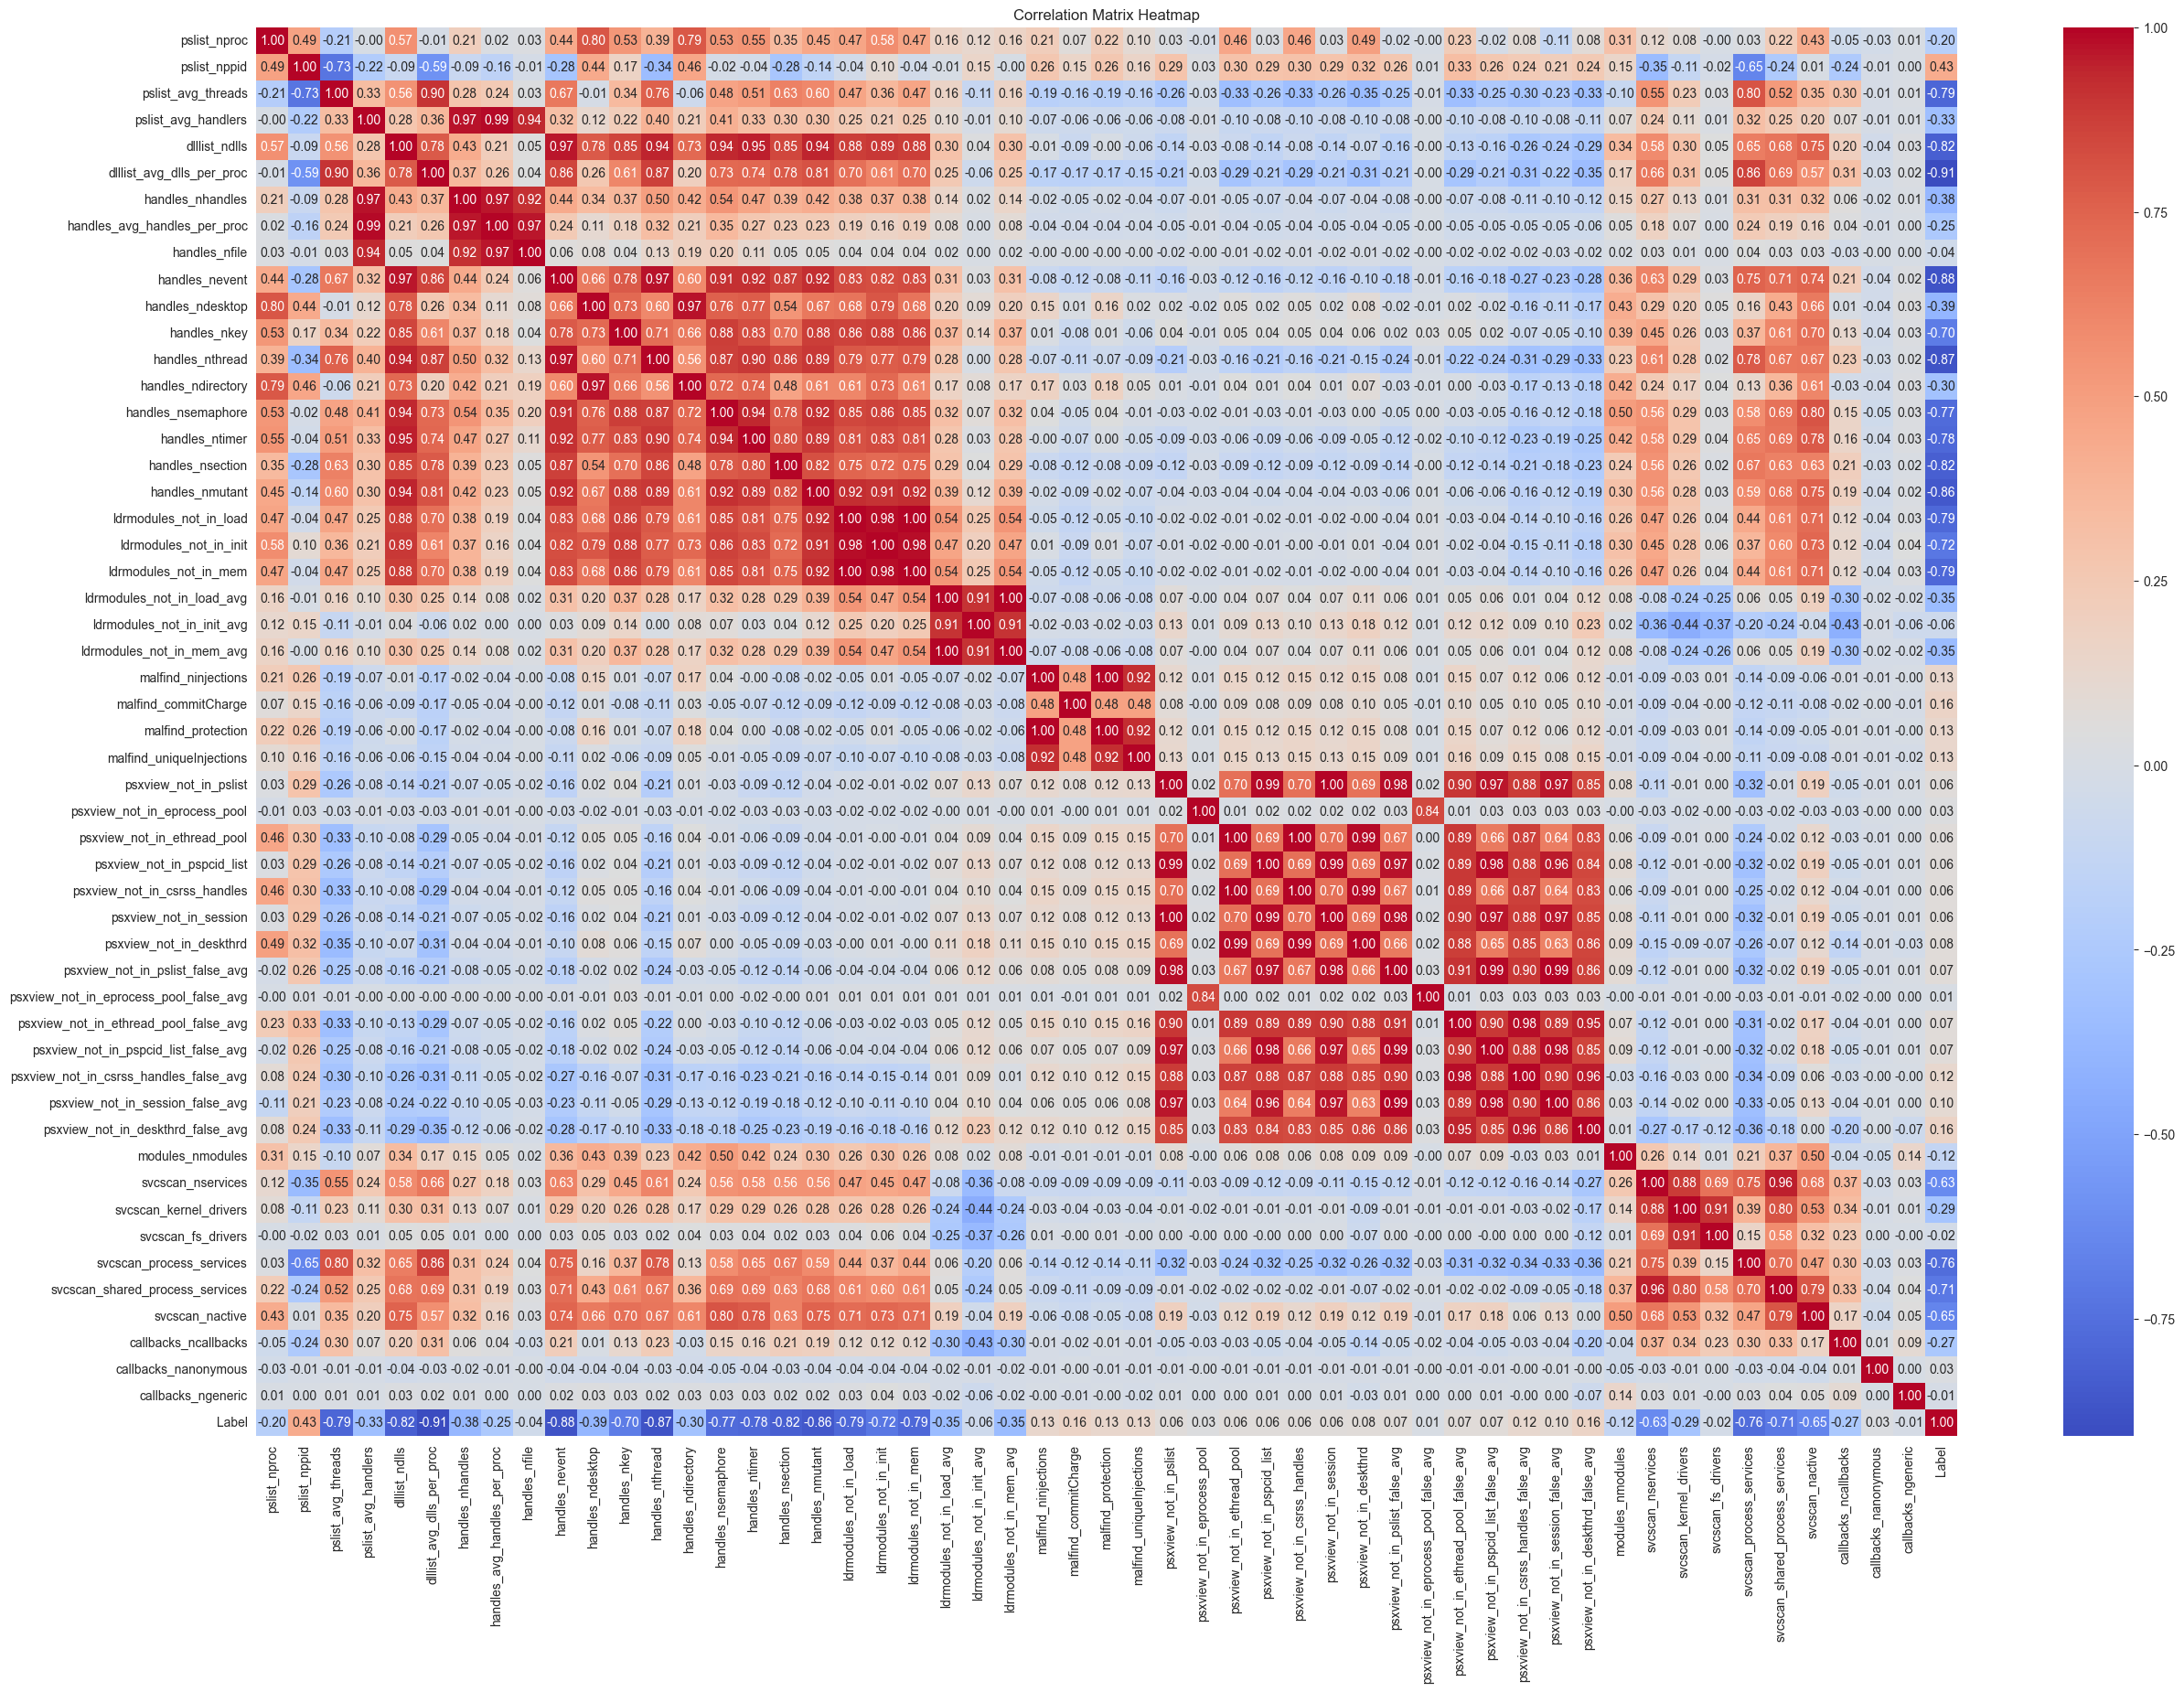

In [62]:
corrmat = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Big Fan of this dataset, very cool problem at hand. Clean and not much remapping to do for the dataset. Lots of features to work with with solid correlation and purely numerical data as well. Lots of Datapoints (58596). Couple issues are that there are some features that I don't know the meaning of and that there is a lot of outliers in almost every feature.